In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.drop('customerID',axis=1,inplace=True)

In [4]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [5]:
df.dropna(inplace=True)

In [6]:
df.Churn=df.Churn.replace({'No':0,'Yes':1})

In [7]:
df_2=pd.get_dummies(df)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
ms=MinMaxScaler(feature_range=(0,1))

In [10]:
df_2=pd.DataFrame(ms.fit_transform(df_2),columns=df_2.columns)

In [11]:
df_2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [12]:
from sklearn.model_selection import train_test_split 

In [13]:
x=df_2.drop('Churn',axis=1)
y=df_2.Churn

In [14]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7027    0.0
7028    0.0
7029    0.0
7030    1.0
7031    0.0
Name: Churn, Length: 7032, dtype: float64

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5,stratify=y,test_size=0.3)

In [16]:
from imblearn.combine import SMOTETomek

In [17]:
smt=SMOTETomek(sampling_strategy='minority')

In [18]:
x_train_over,y_train_over=smt.fit_sample(x_train,y_train)

In [19]:
y_train_over.value_counts()

1.0    3415
0.0    3415
Name: Churn, dtype: int64

In [20]:
x_train_over

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.915493,0.921393,0.862330,0.0,1.0,0.000000,1.000000,1.000000,0.000000,...,1.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.0,1.000000,0.000000
1,0.0,0.957746,0.668159,0.675121,1.0,0.0,0.000000,1.000000,1.000000,0.000000,...,0.0,1.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.000000,0.000000
2,0.0,0.352113,0.013433,0.052279,0.0,1.0,1.000000,0.000000,1.000000,0.000000,...,0.0,0.0,1.0,0.0,0.000000,1.000000,1.000000,0.0,0.000000,0.000000
3,0.0,0.323944,0.806468,0.278393,1.0,0.0,0.000000,1.000000,1.000000,0.000000,...,1.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,1.0,0.000000,0.000000
4,1.0,0.957746,0.687065,0.696602,1.0,0.0,0.000000,1.000000,1.000000,0.000000,...,1.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6825,0.0,0.393627,0.499035,0.222630,1.0,0.0,0.000000,1.000000,0.000000,1.000000,...,1.0,0.0,1.0,0.0,0.000000,1.000000,1.000000,0.0,0.000000,0.000000
6826,0.0,0.011156,0.164406,0.004361,1.0,0.0,1.000000,0.000000,1.000000,0.000000,...,1.0,1.0,0.0,0.0,0.207953,0.792047,0.000000,0.0,0.792047,0.207953
6827,0.0,0.014085,0.765889,0.020336,1.0,0.0,1.000000,0.000000,1.000000,0.000000,...,1.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,1.000000,0.000000
6828,0.0,0.004174,0.718555,0.011552,0.0,1.0,0.703663,0.296337,0.000000,1.000000,...,1.0,1.0,0.0,0.0,0.000000,1.000000,0.296337,0.0,0.703663,0.000000


In [21]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.model_selection import GridSearchCV

/Users/arnavsingh/dl-env/env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [22]:
svm_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'C': [1,10,100],
            'kernel': ['rbf','linear']
        }  
    }
}


In [23]:
scores_svm=[]
for model_name,mp in svm_params.items():
    clf_svm=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf_svm.fit(x_train_over,y_train_over)
    scores_svm.append({'model':model_name,
    'best_score':clf_svm.best_score_,
    'best_params':clf_svm.best_estimator_})

df_svm=pd.DataFrame(scores_svm,columns=['Model','best_score','best_params'])
df_svm

,Model,best_score,best_params
0,NaN,0.849195,"SVC(C=100, gamma='auto', probability=True)"


In [24]:
clf_svm.best_estimator_

SVC(C=100, gamma='auto', probability=True)

In [25]:
xg_params = {
    'xgboost':{
        'model':xgboost.XGBClassifier(objective='binary:logistic'),
        'params':{ "max_depth": [3, 4, 5],
                "learning_rate": [0.1, 0.01, 0.05],
                "gamma": [0, 0.25, 1],
                "reg_lambda": [0, 1, 10],
                "scale_pos_weight": [1, 3, 5],
                "subsample": [0.8],
                "colsample_bytree": [0.5]}
    }
}

In [ ]:
scores_xgb = []

for model_name, mp in xg_params.items():
    clf_xg =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf_xg.fit(x_train_over,y_train_over)
    scores_xgb.append({
        'model': model_name,
        'best_score': clf_xg.best_score_,
        'best_params': clf_xg.best_params_
    })
    
clf_xg_scores = pd.DataFrame(scores_xgb,columns=['model','best_score','best_params'])
clf_xg_scores


In [27]:
clf_xg_scores

,model,best_score,best_params
0,xgboost,0.86896,"{'colsample_bytree': 0.5, 'gamma': 0.25, 'lear..."


In [28]:
xg_optim=clf_xg.best_estimator_

In [29]:
y_pred_prob=xg_optim.predict_proba(x_test)

In [30]:
from sklearn.metrics import roc_curve,precision_recall_curve

In [31]:
y_pred_prob=y_pred_prob[:,1]

In [32]:
fpr,tpr,thresh_roc=roc_curve(y_test,y_pred_prob)

In [33]:
df_fpr_tpr=pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thresh_roc})

In [34]:
df_fpr_tpr

,FPR,TPR,Thresholds
0,0.000000,0.000000,1.969634
1,0.000000,0.001783,0.969634
2,0.000000,0.007130,0.959123
3,0.000646,0.007130,0.954490
4,0.000646,0.017825,0.951020
...,...,...,...
579,0.951582,0.998217,0.006010
580,0.952873,0.998217,0.005976
581,0.989025,0.998217,0.004079
582,0.989025,1.000000,0.004078


<AxesSubplot:xlabel='FPR', ylabel='TPR'>

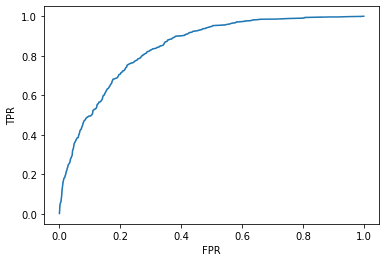

In [35]:
sns.lineplot(data=df_fpr_tpr,x='FPR',y='TPR')

In [36]:
gmean_roc=np.sqrt(tpr*(1-fpr))

In [37]:
index_roc=np.argmax(gmean_roc)

In [38]:
thresh_op_roc=np.round(thresh_roc[index_roc],4)

In [39]:
thresh_op_roc

0.333

In [40]:
p,r,thresh_pr=precision_recall_curve(y_test,y_pred_prob)

In [41]:
df_pr=pd.DataFrame({'Precision':p[:-1],'Recall':r[:-1],'Thresholds':thresh_pr})

In [42]:
df_pr

,Precision,Recall,Thresholds
0,0.268036,1.000000,0.004078
1,0.267686,0.998217,0.004079
2,0.267814,0.998217,0.004101
3,0.267943,0.998217,0.004133
4,0.268071,0.998217,0.004171
...,...,...,...
2066,0.800000,0.007130,0.954490
2067,1.000000,0.007130,0.959123
2068,1.000000,0.005348,0.963703
2069,1.000000,0.003565,0.968651


In [43]:
fscore=(2*p*r)/(p+r)

In [44]:
index_pr=np.argmax(fscore)

In [45]:
thresh_op_pr=np.round(thresh_pr[index_pr],4)

In [46]:
thresh_op_pr

0.333

In [47]:
## both give an approximate threshold of 0.34

y_pre=xg_optim.predict(x_test)
y_post=[]


In [48]:
for i in y_pred_prob:
    if i>=0.34:
        y_post.append(1)
    else:
        y_post.append(0)


In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm_pre=confusion_matrix(y_test,y_pre)
cm_post=confusion_matrix(y_test,y_post)

Text(33.0, 0.5, 'Truth')

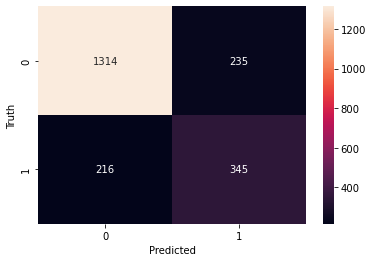

In [51]:
sns.heatmap(cm_pre,annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(33.0, 0.5, 'Truth')

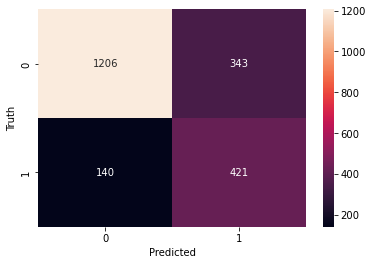

In [52]:
sns.heatmap(cm_post,annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
from sklearn.metrics import classification_report

In [54]:
classrep_pre=classification_report(y_test,y_pre)

In [55]:
classrep_post=classification_report(y_test,y_post)

In [56]:
print(classrep_pre)

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      1549
         1.0       0.59      0.61      0.60       561

    accuracy                           0.79      2110
   macro avg       0.73      0.73      0.73      2110
weighted avg       0.79      0.79      0.79      2110



In [57]:
print(classrep_post)

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.83      1549
         1.0       0.55      0.75      0.64       561

    accuracy                           0.77      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.77      0.78      2110

